In [2]:
import os
import sys
import random

sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from file_utils import find_file_cwd_and_parent_dirs
from recipe_dataset import RecipeDataset, RECIPE_DATASET_FILENAME, load_dataset
from brewbrain import init_rng_seeding

init_rng_seeding(42)

In [8]:
dataset = load_dataset(find_file_cwd_and_parent_dirs(RECIPE_DATASET_FILENAME, ".."))

Loading mappings from ../recipe_dataset.pkl...


In [24]:
# Box plots for quantities/concentrations of Hops, Adjuncts, and Misc

hop_concentrations = np.concatenate([r['hop_concentrations'][r['hop_type_inds'] != 0] for r in dataset.recipes])
adjunct_amts = np.concatenate([r['adjunct_amts'][r['adjunct_core_type_inds'] != 0] for r in dataset.recipes])
misc_amts = np.concatenate([r['misc_amts'][r['misc_type_inds'] != 0] for r in dataset.recipes])

In [25]:
# Find outliers using IQR
hop_q3, hop_q1 = np.percentile(hop_concentrations, [75,25])
hop_iqr = hop_q3 - hop_q1
hop_outlier_wall = hop_q3 + 1.5*hop_iqr
outlier_hop_recipes = len([r for r in dataset.recipes if np.any(r['hop_concentrations'] > hop_outlier_wall)])
print(f"Hop outliers (above {hop_outlier_wall}): {outlier_hop_recipes}")

adjunct_q3, adjunct_q1 = np.percentile(adjunct_amts, [75,25])
adjunct_iqr = adjunct_q3 - adjunct_q1
adjunct_outlier_wall = adjunct_q3 + 1.5*adjunct_iqr
outlier_adj_recipes = len([r for r in dataset.recipes if np.any(r['adjunct_amts'] > adjunct_outlier_wall)])
print(f"Adjunct outliers (above {adjunct_outlier_wall}): {outlier_adj_recipes}")

misc_q3, misc_q1 = np.percentile(misc_amts, [75, 25])
misc_iqr = misc_q3 - misc_q1
misc_outlier_wall = misc_q3 + 1.5*misc_iqr
outlier_misc_recipes = len([r for r in dataset.recipes if np.any(r['misc_amts'] > misc_outlier_wall)])
print(f"Misc. outliers (above {misc_outlier_wall}): {outlier_misc_recipes}")


Hop outliers (above 2.7233247458934784): 50645
Adjunct outliers (above 97.6107726097107): 9998
Misc. outliers (above 131.64253771677613): 0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe62cac09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe62cac0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe62c4a8190>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe62cac1450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe62cac16f0>,
 'means': []}

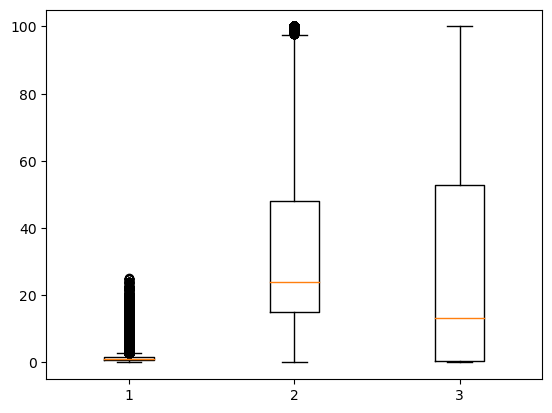

In [26]:
fig, ax = plt.subplots()
ax.boxplot([hop_concentrations, adjunct_amts, misc_amts])

In [9]:
# Count number of recipes with more than 16 hops slots taken up
high_misc_recipes = [r for r in dataset.recipes if np.count_nonzero(r['misc_type_inds']) > 8]
print(len(high_misc_recipes))

0
